# Project: Investigate the TMDb movie database

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction  

This dataset is about movies. It consists of movies from different genres of different directors and production companies beginning in 1960 till 2015. You can see the revenue, the budget and other interesting information about the movies in this dataset.  
The possible questions could be:   
- Which movie was the most profitable? 
- Wich movie was the most expensive? 
- Does the number of movies increase/decrease in time?
- Which movie was the best rated?
- Which movie was rated the most?
- Which movie is most popular?
- How strict are people at voting?
- Do people like rating the movies?
- How do different variables influence the revenue?


In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
# Data Wrangling


## General Properties

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
#Check the types to see if a transformation is needed.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

No transformation needed

In [29]:
#Check for NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

NaN values exist in different columns

In [30]:
#check the statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [31]:
#Drop the columns I do not need for the analysis
df.drop(['imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','genres',
          'release_date'], axis=1,inplace=True)
df.head()

,id,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 933.9+ KB


In [33]:
#Drop the rows with NaN-values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9815 entries, 0 to 10865
Data columns (total 11 columns):
id                      9815 non-null int64
popularity              9815 non-null float64
original_title          9815 non-null object
director                9815 non-null object
runtime                 9815 non-null int64
production_companies    9815 non-null object
vote_count              9815 non-null int64
vote_average            9815 non-null float64
release_year            9815 non-null int64
budget_adj              9815 non-null float64
revenue_adj             9815 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 920.2+ KB


In [34]:
#Extract data where the budget and revenue is greater than 0 
df2 = df[(df['budget_adj'] > 0) & (df['revenue_adj'] > 0)]
#Calculate the mean for budget and revenue. 
mean_budget = df2['budget_adj'].mean()
mean_revenue = df2['revenue_adj'].mean()
#Needs to be done to calculate a reliable profit of the movies 


In [35]:
#Replace 0 values in budget and revenue with NaN values, to fill in with the mean
df['budget_adj'].replace(float(0),np.nan,inplace=True)
df['revenue_adj'].replace(float(0),np.nan,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9815 entries, 0 to 10865
Data columns (total 11 columns):
id                      9815 non-null int64
popularity              9815 non-null float64
original_title          9815 non-null object
director                9815 non-null object
runtime                 9815 non-null int64
production_companies    9815 non-null object
vote_count              9815 non-null int64
vote_average            9815 non-null float64
release_year            9815 non-null int64
budget_adj              5031 non-null float64
revenue_adj             4753 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 920.2+ KB


In [36]:
#Fill NaN-values with the calculated averages
df['budget_adj'].fillna(mean_budget,inplace=True)
df['revenue_adj'].fillna(mean_revenue,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9815 entries, 0 to 10865
Data columns (total 11 columns):
id                      9815 non-null int64
popularity              9815 non-null float64
original_title          9815 non-null object
director                9815 non-null object
runtime                 9815 non-null int64
production_companies    9815 non-null object
vote_count              9815 non-null int64
vote_average            9815 non-null float64
release_year            9815 non-null int64
budget_adj              9815 non-null float64
revenue_adj             9815 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 920.2+ KB


In [37]:
#Check if replace was successfull
print("Number of budget with value 0: %s" % str((df.budget_adj == 0).sum()))
print("Number of revenue with value 0: %s" % str((df.revenue_adj == 0).sum()))

Number of budget with value 0: 0
Number of revenue with value 0: 0


<a id='eda'></a>
## Exploratory Data Analysis




### Which movie made the most profit?

In [38]:
# First create a column named 'profit'
df['profit'] = df['revenue_adj']-df['budget_adj']
df.query('profit == profit.max()')

,id,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,12.037933,Star Wars,George Lucas,121,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


'Star Wars' by George Lucas was the movie which made the most profit.

### Which movie was the most expensive?

In [39]:
df.query('budget_adj == budget_adj.max()')

,id,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,The Warrior's Way,Sngmoo Lee,100,Boram Entertainment Inc.,74,6.4,2010,425000000.0,11087569.0,-413912431.0


It was the movie 'The Warrior's Way' by Singmoo Lee.

### Which movie was rated best?

In [40]:
df.query('vote_average == vote_average.max()')

,id,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
6911,24970,0.21201,Pink Floyd: Pulse,David Mallet,145,SMV Enterprises|Columbia Music Video|EMI,23,8.7,2006,4.469337e+07,1.386069e+08,9.391354e+07


The movie 'Pink Floyd: Pulse' has the best average rating but the count of votes is low. 

### Which movie was rated the most?

In [41]:
df.query('vote_count == vote_count.max()')

,id,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1919,27205,9.363643,Inception,Christopher Nolan,148,Legendary Pictures|Warner Bros.|Syncopy,9767,7.9,2010,160000000.0,825500000.0,665500000.0


### How strict is the audience with the movie ratings?

Text(0,0.5,'Counts')

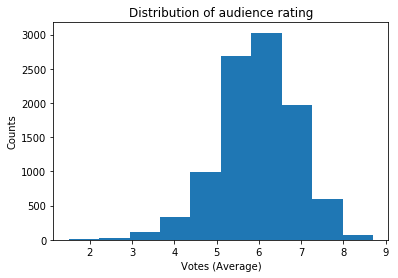

In [42]:
#I used a histogram to see the distribution of te average ratings.
plt.hist(df['vote_average'])
plt.title('Distribution of audience rating')
plt.xlabel('Votes (Average)')
plt.ylabel('Counts')

The most frequent rating is between 6 and 7.

### Do people like to give votes for movies they saw?

Text(0,0.5,'Counts')

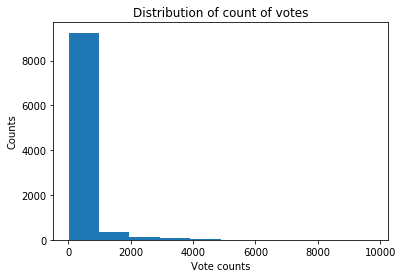

In [43]:
plt.hist(df['vote_count'])
plt.title('Distribution of count of votes')
plt.xlabel('Vote counts')
plt.ylabel('Counts')

This plot shows, that the interest in voting (for movies) is low.

### Does the number of movies increase with the years?

Text(0,0.5,'Counts')

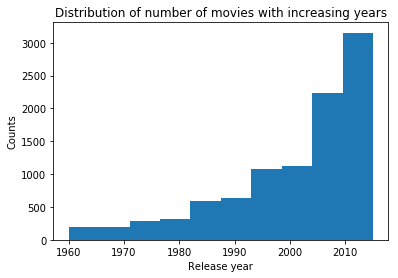

In [44]:
#I used a histogram to see the distribution of the number of movies trough the years.
plt.hist(df['release_year'])
plt.title('Distribution of number of movies with increasing years')
plt.xlabel('Release year')
plt.ylabel('Counts')

This plot shows the evidence, that the further the time the more movies were made.

### Is the revenue related to a specific variable?

Text(0,0.5,'Revenue')

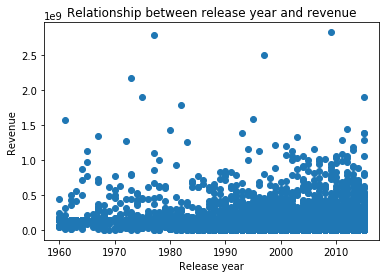

In [45]:
#I ued a scatterplot to display the relationship between the two variables
plt.scatter(df['release_year'],df['revenue_adj'])
plt.title('Relationship between release year and revenue')
plt.xlabel('Release year')
plt.ylabel('Revenue')

Text(0,0.5,'Revenue')

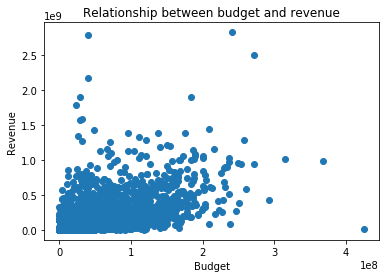

In [46]:
#I ued a scatterplot to display the relationship between the two variables
plt.scatter(df['budget_adj'],df['revenue_adj'])
plt.title('Relationship between budget and revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

Text(0,0.5,'Revenue')

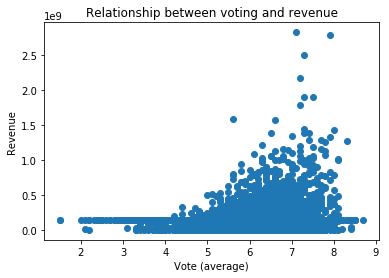

In [47]:
#I ued a scatterplot to display the relationship between the two variables
plt.scatter(df['vote_average'],df['revenue_adj'])
plt.title('Relationship between voting and revenue')
plt.xlabel('Vote (average)')
plt.ylabel('Revenue')

Text(0,0.5,'Revenue')

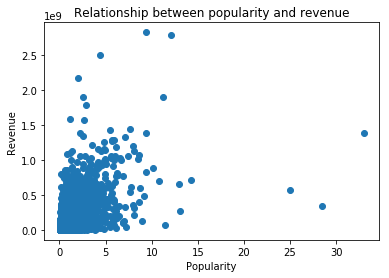

In [48]:
#I ued a scatterplot to display the relationship between the two variables
plt.scatter(df['popularity'],df['revenue_adj'])
plt.title('Relationship between popularity and revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

<a id='conclusions'></a>
## Conclusions

Due to the analysis I found out that "Star Wars" was the most profitable movie in this database.  
The most expensive one was "The Warrior's Way".  
The movie 'Pink Floyd: Pulse' has the best average rating with a low count of votes, whereas the movie 'Inception' has the highest count on votes.  
I gave evidence that the number of movies increased in time.   
Furthermore I analysed the strict view of the audience by plotting the distribution of the average movie ratings. The plot shows, that the audience is not very strict/picky because the average ratings range between 6 and 7.   
In the last section of the explanatory analysis I wanted to show a relationship between a few variables and the 'revenue_adj' variable. As you can see, there is no specfic relationship between the variables 'release_year' and 'revenue_adj', like there is no relationship between the variables 'budget_adj' and 'revenue_adj'. A strong relationship is shown between the variables 'vote_average' and 'revenue_adj'.  
So you can say that it does no really matter when the movie was made or how much the production did cost, it matters how the audience liked the movie.


Sources 

https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-by-zeroes-in-a-column-of-a-pandas-dataframe

https://stackoverflow.com/questions/35584085/how-to-count-duplicate-rows-in-pandas-dataframe

https://stackoverflow.com/questions/20199129/pandas-get-duplicated-indexes/42259221

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe

https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell


